<a href="https://colab.research.google.com/github/jnielsonresearch/crunch-time-analytics/blob/main/Hustle%20Stats%20Research/Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification ML Models

## Importing the libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [ ]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm

In [ ]:
# Plotting configuration for Jupyter notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Importing the dataset

In [ ]:
# Download the data
import os
datapath = os.path.join("Data", "")

files = ['playoff_boxscores.csv', 'team_box_hustle.csv']
  
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jnielsonresearch/crunch-time-analytics/main/Hustle%20Stats%20Research/"
os.makedirs(datapath, exist_ok=True)
for filename in files:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "Data/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

playoff_boxscores = pd.read_csv(datapath + files[0])
team_box_hustle = pd.read_csv(datapath + files[1])

In [ ]:
playoff_boxscores.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  OREB  DREB  REB  AST  STL  BLK  \
0  2020-09-27    BOS @ MIA  L  240  113  ...    13    29   42   26    7    2   
1  2020-09-25  BOS vs. MIA  W  238  121  ...    13    37   50   29    7    4   
2  2020-09-23    BOS @ MIA  L  239  109  ...    12    34   46   28    3    5   
3  2020-09-19    BOS @ MIA  W  240  117  ...    10    40   50   27    8    3   
4  2020-09-17  BOS vs. MIA  L  240  101  ...     6    35   41   19    5    3   

   TOV  PF  PLUS_MINUS   SEASON  
0   10  21       -12.0  2019-20  
1   11  23        13.0  2019-20  
2   19  24         0.2  2019-20  
3   14  29         8.4  2019-20  
4   20  22        -5.0  2019-20  

[5 rows x 29 columns]

In [ ]:
team_box_hustle.head()

GAME_ID     TEAM_ID TEAM_NAME TEAM_ABBREVIATION   TEAM_CITY  \
0  41600171  1610612762      Jazz               UTA        Utah   
1  41600171  1610612746  Clippers               LAC          LA   
2  41600203  1610612738   Celtics               BOS      Boston   
3  41600203  1610612764   Wizards               WAS  Washington   
4  41500135  1610612738   Celtics               BOS      Boston   

         MINUTES  PTS  CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  \
0  240.000000:00   97               67                   44   
1  240.000000:00   95               60                   50   
2  240.000000:00   89               68                   48   
3  240.000000:00  116               61                   35   
4  240.000000:00   83               54                   37   

   CONTESTED_SHOTS_3PT  ...  SCREEN_ASSISTS  SCREEN_AST_PTS  \
0                   23  ...              10              21   
1                   10  ...               7              14   
2                   20  ...               8              18   
3                   26  ...              12              27   
4                   17  ...               3               6   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                      8            0            0                         0   
1                      8            0            0                         0   
2                      8            0            0                         0   
3                     12            0            0                         0   
4                      1            0            0                         0   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  
0                    0         0  
1                    0         0  
2                    0         0  
3                    0         0  
4                    0         0  

[5 rows x 22 columns]

In [ ]:
# Drop duplicate columns in team_box_hustle dataset 
cols = ['GAME_ID', 'TEAM_ID','CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT',
       'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS',
       'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS',
       'DEF_BOXOUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'BOX_OUTS']
team_box_hustle = team_box_hustle[cols]

In [ ]:
# Merge playoff_boxscores and team_box_hustle datasets on GAME_ID
hustle_stats = playoff_boxscores.merge(team_box_hustle, how='inner', on=['GAME_ID', 'TEAM_ID'])

In [ ]:
hustle_stats.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'SEASON',
       'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT',
       'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS',
       'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED',
       'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS', 'BOX_OUTS'],
      dtype='object')

In [ ]:
hustle_stats.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  SCREEN_ASSISTS  SCREEN_AST_PTS  \
0  2020-09-27    BOS @ MIA  L  240  113  ...               6              14   
1  2020-09-25  BOS vs. MIA  W  238  121  ...               9              23   
2  2020-09-23    BOS @ MIA  L  239  109  ...               4              10   
3  2020-09-19    BOS @ MIA  W  240  117  ...               4               9   
4  2020-09-17  BOS vs. MIA  L  240  101  ...              11              24   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          2                          4   
1                          2                          3   
2                          2                          2   
3                          3                          4   
4                          7                          2   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                      6            5            6                         8   
1                      5            4            8                        11   
2                      4            3           16                        13   
3                      7            2           11                         8   
4                      9            2            8                         6   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  
0                    4        11  
1                    7        12  
2                    6        19  
3                    2        13  
4                    2        10  

[5 rows x 44 columns]

In [ ]:
# Create calculated metric NBA composite "Hustle Rating":
# Formula source: https://grantland.com/the-triangle/how-do-you-measure-hustle-in-the-nba-theres-a-stat-for-that/

# 2-Point Field Goal Contested: A contest decreases the probability of a 2-Point Field Goal going in by .05 x 2.0 Point Value of a 2-Point Field Goal = .1 Hustle Points.

# 3-Point Field Goal Contested: A contest decreases the probability of a 3-Point Field Goal going in by .05 x 3.0 Point Value of a 3-Point Field Goal = .15 Hustle Points.

# Deflection: We estimate that the team whose player deflected the ball has a .25 chance of recovering the ball x 1.0 Expected Point Value for gaining possession = .25 Hustle Points.

# Loose-Ball Recovered: Recovering a loose ball increases the probability of possession by .5 x 1.0 Expected Point Value for gaining possession = .5 Hustle Points.

# Charge: 1.5 Expected Point Value for creating a turnover when the opponent otherwise would have likely taken a very good shot (as most charges take place near the basket) + .25 Expected Point Value by drawing a foul on the opposing player (gets team closer to the bonus and limits opposing player’s ability to play) = 1.75 Hustle Points.

hustle_stats['HUSTLE_RATING'] = hustle_stats.apply(lambda x: x['CONTESTED_SHOTS_2PT']*0.1 + x['CONTESTED_SHOTS_3PT']*0.15 + x['DEFLECTIONS']*0.25 + x['LOOSE_BALLS_RECOVERED']*0.5 + x['CHARGES_DRAWN']*1.5, axis=1)

In [ ]:
hustle_stats.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  SCREEN_AST_PTS  \
0  2020-09-27    BOS @ MIA  L  240  113  ...              14   
1  2020-09-25  BOS vs. MIA  W  238  121  ...              23   
2  2020-09-23    BOS @ MIA  L  239  109  ...              10   
3  2020-09-19    BOS @ MIA  W  240  117  ...               9   
4  2020-09-17  BOS vs. MIA  L  240  101  ...              24   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          2                          4   
1                          2                          3   
2                          2                          2   
3                          3                          4   
4                          7                          2   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                      6            5            6                         8   
1                      5            4            8                        11   
2                      4            3           16                        13   
3                      7            2           11                         8   
4                      9            2            8                         6   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  HUSTLE_RATING  
0                    4        11          14.55  
1                    7        12          12.60  
2                    6        19          11.60  
3                    2        13          13.80  
4                    2        10          14.45  

[5 rows x 45 columns]

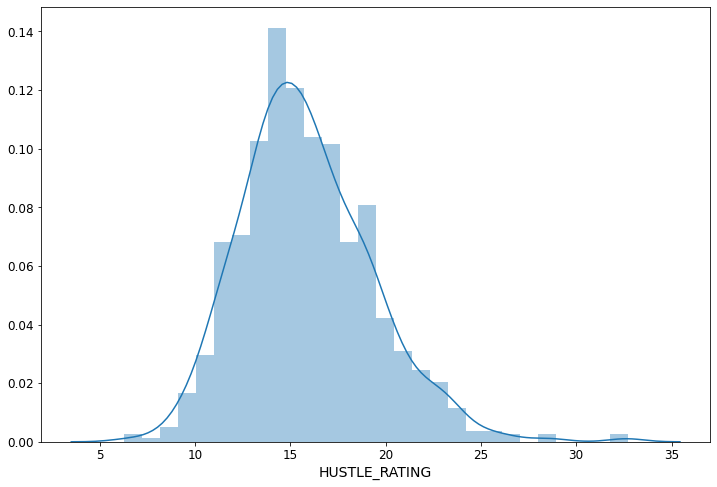

In [ ]:
# Distribution plot of hustle_rating
plt.figure(figsize=(12,8))
sns.distplot(hustle_stats['HUSTLE_RATING'])

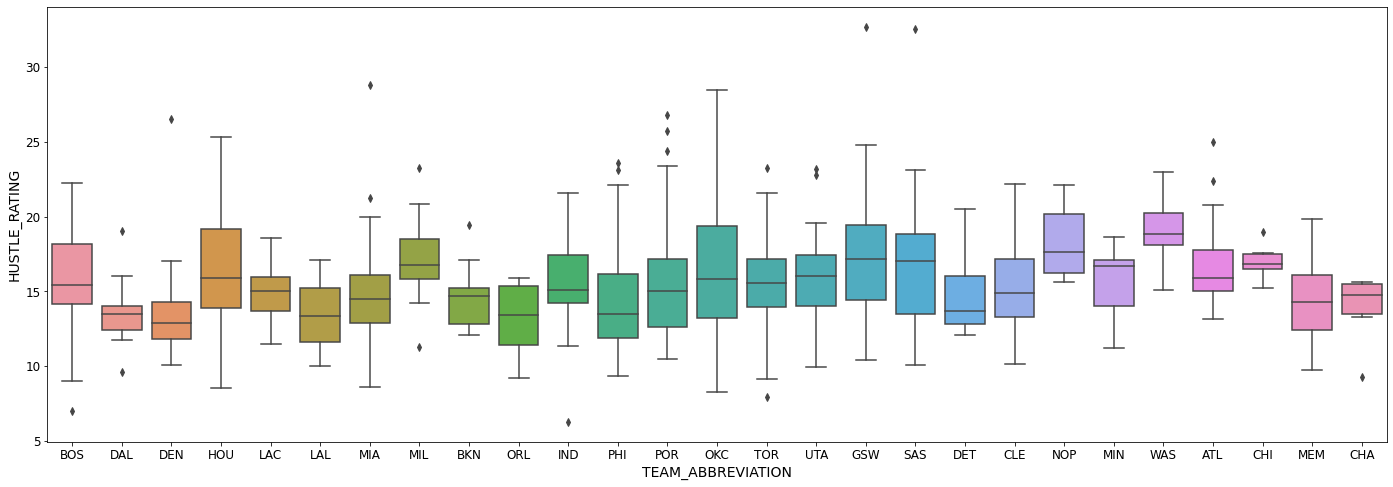

In [ ]:
# HUSTLE_RATING BY TEAM
plt.figure(figsize=(24,8))
sns.boxplot(data=hustle_stats, x='TEAM_ABBREVIATION', y='HUSTLE_RATING')

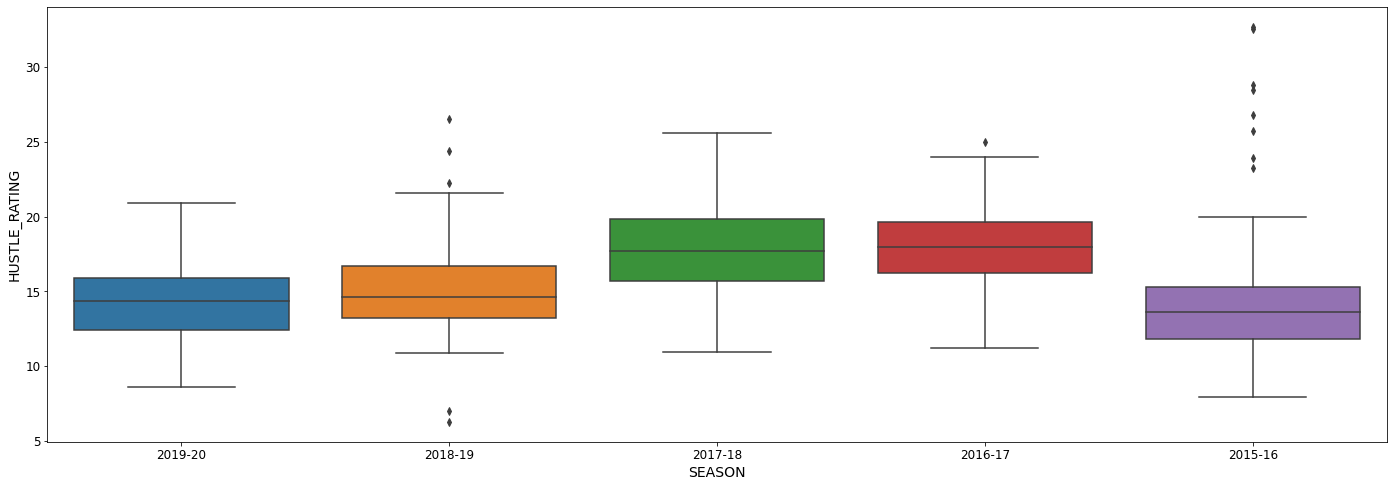

In [ ]:
# HUSTLE_RATING BY SEASON
plt.figure(figsize=(24,8))
sns.boxplot(data=hustle_stats, x='SEASON', y='HUSTLE_RATING')

## Correlation Pairplot for Hustle Stats

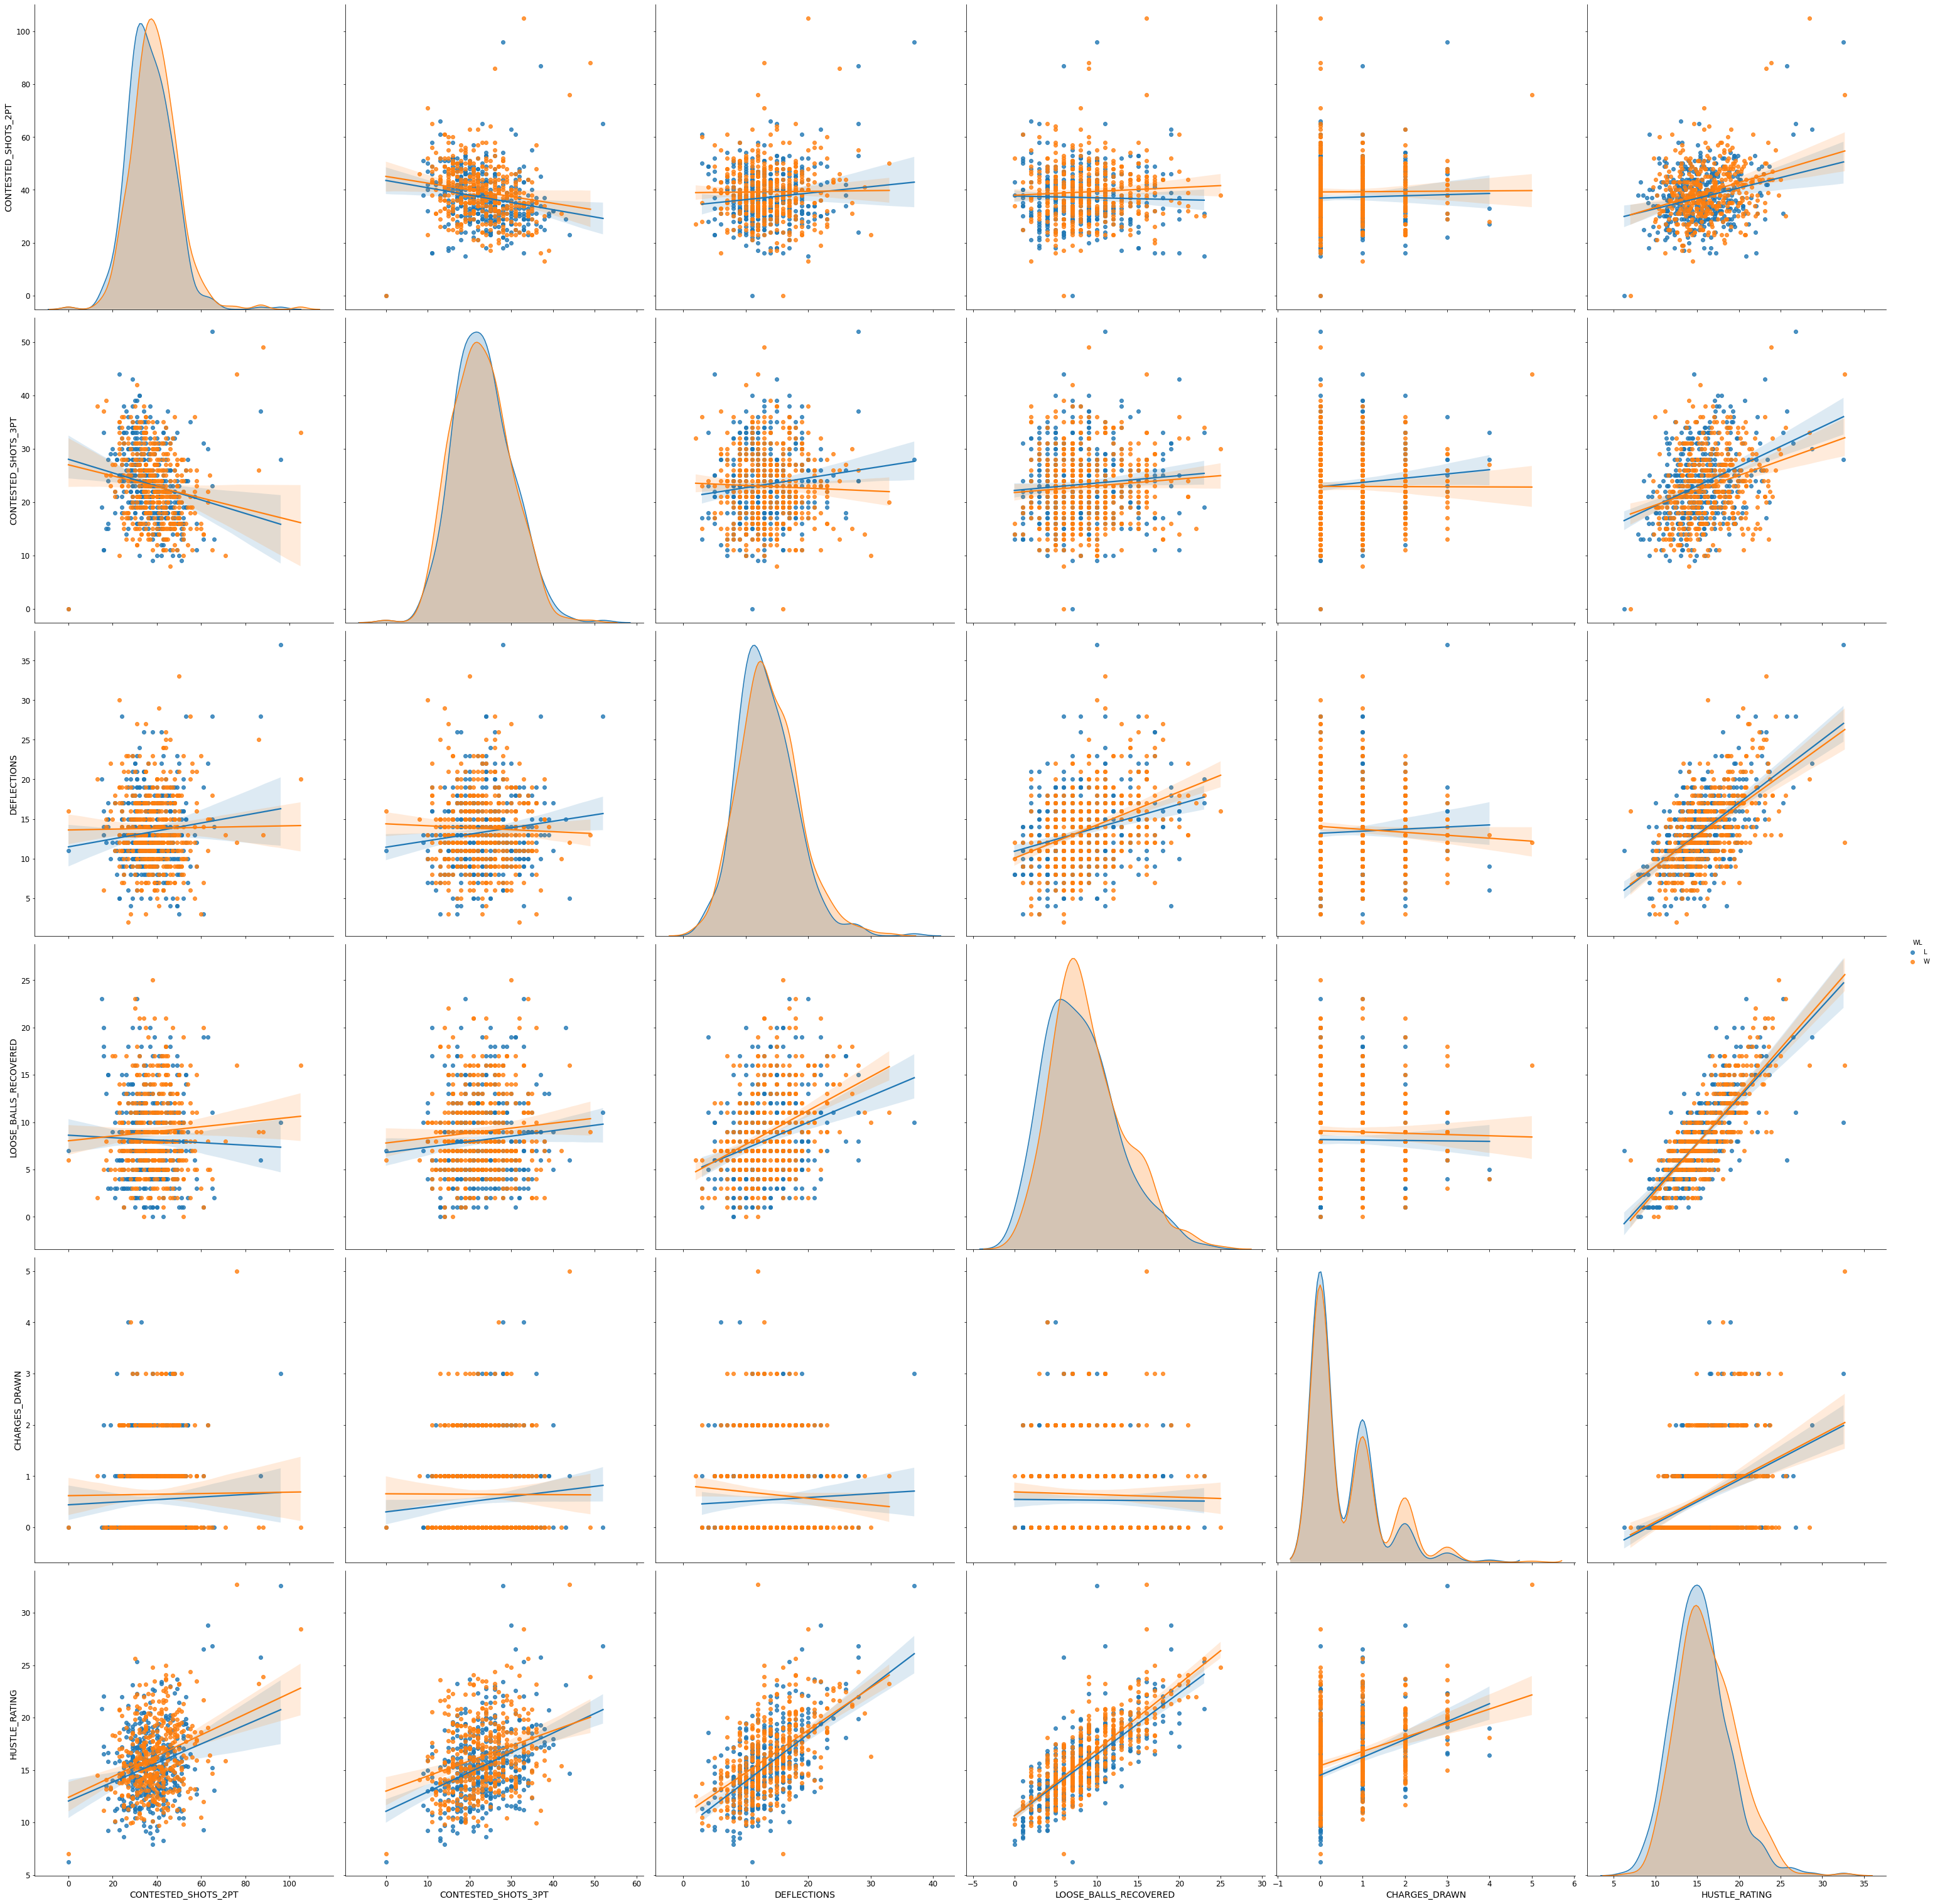

In [ ]:
# Pairplot with WL

dataset = hustle_stats[['CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT', 'DEFLECTIONS',
                        'LOOSE_BALLS_RECOVERED', 'CHARGES_DRAWN', 'HUSTLE_RATING', 'WL']]

sns.pairplot(dataset, height=7, kind='reg', hue='WL')

## Scaling and Train Test Split of Dataset

In [ ]:
# hustle features for classification model
X = hustle_stats[['CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT', 'DEFLECTIONS',
                  'LOOSE_BALLS_RECOVERED', 'CHARGES_DRAWN', 'HUSTLE_RATING']].values

# encode class values WL as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = hustle_stats['WL']
encoder.fit(y)
y = encoder.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression Model on Training and Test sets

Logistic Regression Model:
               precision    recall  f1-score   support

     class 0       0.56      0.60      0.57        84
     class 1       0.55      0.51      0.53        81

    accuracy                           0.55       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.55      0.55      0.55       165

Confusion Matrix:
 [[50 34]
 [40 41]]

Average Cross Validation Score:  0.55

Average Precision-Recall Score: 0.52


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.52')

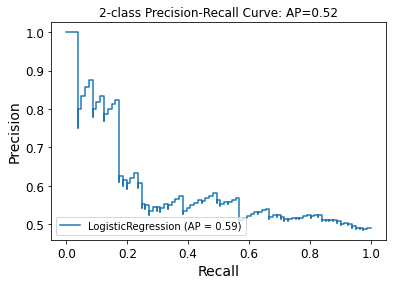

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Logistic Regression Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Schochastic Gradient Decent Classifier Model

Schochastic Gradient Decent Classifier Model:
               precision    recall  f1-score   support

     class 0       0.66      0.23      0.34        84
     class 1       0.52      0.88      0.65        81

    accuracy                           0.55       165
   macro avg       0.59      0.55      0.50       165
weighted avg       0.59      0.55      0.49       165

Confusion Matrix:
 [[19 65]
 [10 71]]

Average Cross Validation Score:  0.52

Average Precision-Recall Score: 0.52


Text(0.5, 1.0, '\n2-class Precision-Recall Curve: AP=0.52')

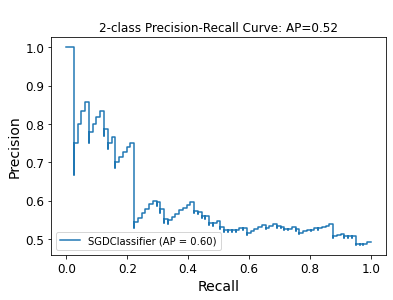

In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Schochastic Gradient Decent Classifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('\n2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))



## KNN Classification Model

KNeighborsClassifier Model:
               precision    recall  f1-score   support

     class 0       0.63      0.65      0.64        84
     class 1       0.63      0.60      0.62        81

    accuracy                           0.63       165
   macro avg       0.63      0.63      0.63       165
weighted avg       0.63      0.63      0.63       165

Confusion Matrix:
 [[55 29]
 [32 49]]

Average Cross Validation Score:  0.51

Average Precision-Recall Score: 0.57


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.57')

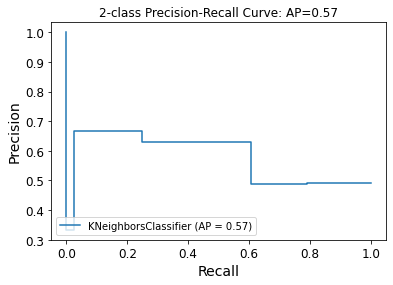

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("KNeighborsClassifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Support Vector Machine Classification Model

Support Vector Machine Classification Model:
               precision    recall  f1-score   support

     class 0       0.56      0.67      0.61        84
     class 1       0.57      0.46      0.51        81

    accuracy                           0.56       165
   macro avg       0.56      0.56      0.56       165
weighted avg       0.56      0.56      0.56       165

Confusion Matrix:
 [[56 28]
 [44 37]]

Average Cross Validation Score:  0.53

Average Precision-Recall Score: 0.53


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.53')

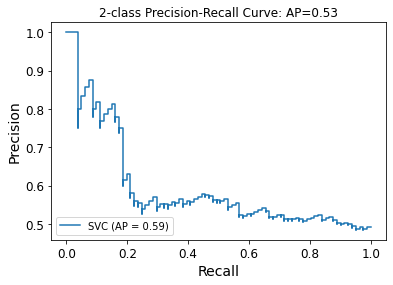

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Support Vector Machine Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Naive Bayes Classification Model

Naive Bayes Classification Model:
               precision    recall  f1-score   support

     class 0       0.58      0.65      0.61        84
     class 1       0.59      0.51      0.54        81

    accuracy                           0.58       165
   macro avg       0.58      0.58      0.58       165
weighted avg       0.58      0.58      0.58       165

Confusion Matrix:
 [[55 29]
 [40 41]]

Average Cross Validation Score:  0.56

Average Precision-Recall Score: 0.54


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.54')

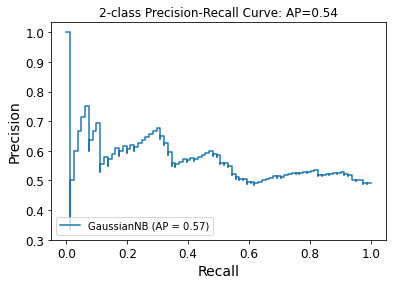

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Naive Bayes Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Random Forest Classification Model

Random Forest Classification Model:
               precision    recall  f1-score   support

     class 0       0.64      0.64      0.64        84
     class 1       0.62      0.62      0.62        81

    accuracy                           0.63       165
   macro avg       0.63      0.63      0.63       165
weighted avg       0.63      0.63      0.63       165

Confusion Matrix:
 [[54 30]
 [31 50]]

Average Cross Validation Score:  0.53

Average Precision-Recall Score: 0.57


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.57')

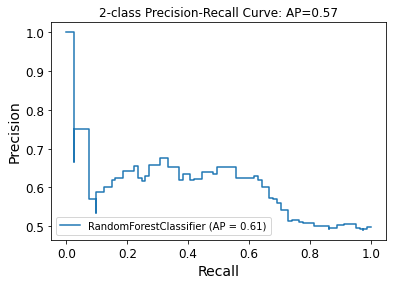

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print("Random Forest Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))